### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [391]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [392]:
data = pd.read_csv('data/coupons.csv')

In [393]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [394]:
# get more information about the dataset

print("-------------")
print("Show : data.info()")
data.info()
print("-------------")
print("Show : data.describe()")
data.describe()
print("-------------")
print("Size of dataset [row:column]", data.shape)
print("-------------")
#data.duplicated()
print("Duplicates      :", data.duplicated())
print("-------------")

-------------
Show : data.info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar

In [395]:
# first of all check for NaN data
data.isna().sum()
# result shows 
# The whole dataset consits of 12684 rows and in the column "car" are only 108 entries

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [396]:
# let´s see how the car data look like
# first we collect all not NaN data from the column "car"
result = data.loc[(data['car'] > ''), ['car']]
# now we group the data by the entry of the car column to get only one row by car
# use the max function to get only on row (the max of the same values is the value)
result = result.groupby('car').agg(max)
# Now print out all different values coming in the dataset column "car"
for i in range (len(result)):
    print(f"Show car version {i} data value:  ", result.iloc[i])
# So there are only five different entries in the column 'car'
# --> the column name was not correct it should be name as "moving_by"
# --> the entries "Car that is ..." and "Mazda5" could be combined to "Car"
# --> also the entries "Scooter and motorcycle" could be changed to "Scooter or Motorcycle"
# --> the entries "do not drive" could be changed to "unkown"
# --> unkown could be also used for NaN values

Show car version 0 data value:   Series([], Name: Car that is too old to install Onstar :D, dtype: float64)
Show car version 1 data value:   Series([], Name: Mazda5, dtype: float64)
Show car version 2 data value:   Series([], Name: Scooter and motorcycle, dtype: float64)
Show car version 3 data value:   Series([], Name: crossover, dtype: float64)
Show car version 4 data value:   Series([], Name: do not drive, dtype: float64)


3. Decide what to do about your missing data -- drop, replace, other...

In [397]:

# add a new column for moving_by and copy the column 'car' to save the original column
data['moving_by'] = data['car']
data.tail(5)
# now we change the content of the column moving_by
# as decribed above
values={'moving_by':'unkown'}
data  = data.fillna(value=values)
data.replace(['Car that is too old to install Onstar :D','Mazda5'], 'Car', inplace=True)
data.replace('Scooter and motorcycle','Scooter or Motorcycle', inplace=True)
data.replace('do not drive','unkown', inplace=True)
data.head(5)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,moving_by
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,NaN,4~8,1~3,1,0,0,0,1,1,unkown
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,NaN,4~8,1~3,1,0,0,0,1,0,unkown
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,NaN,4~8,1~3,1,1,0,0,1,1,unkown
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,NaN,4~8,1~3,1,1,0,0,1,0,unkown
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,NaN,4~8,1~3,1,1,0,0,1,0,unkown


In [398]:
# let´s see how the new column looks like
result = data.loc[(data['moving_by'] > ''), ['moving_by']]
result = result.groupby('moving_by').agg(max)
for i in range (len(result)):
    print(f"Show car version {i} data value:  ", result.iloc[i])

Show car version 0 data value:   Series([], Name: Car, dtype: float64)
Show car version 1 data value:   Series([], Name: Scooter or Motorcycle, dtype: float64)
Show car version 2 data value:   Series([], Name: crossover, dtype: float64)
Show car version 3 data value:   Series([], Name: unkown, dtype: float64)


In [399]:
# first of all check for NaN data
print("Check for NaN in 'moving_by' size :", data['moving_by'].isna().sum())
# moving_by is now clean

Check for NaN in 'moving_by' size : 0


In [400]:
# lets have a look on the column 'Bar', 'CoffeeHouse'
print('Before cleaning')
print('---------------')
print("Check for NaN in 'Bar' size :", data['Bar'].isna().sum())
result = data.loc[data['Bar'] > '', ['Bar']]
result = result.groupby('Bar').agg(max)
for i in range (len(result)):
    print(f"Show 'CoffeeHouse' version {i} data value:  ", result.iloc[i])

print('')
print("Check for NaN in 'CoffeeHouse' size :", data['CoffeeHouse'].isna().sum())
result = data.loc[data['CoffeeHouse'] > '', ['CoffeeHouse']]
result = result.groupby('CoffeeHouse').agg(max)
for i in range (len(result)):
    print(f"Show 'CoffeeHouse' version {i} data value:  ", result.iloc[i])
print('')
print("Check for NaN in 'CarryAway' size :", data['CarryAway'].isna().sum())
result = data.loc[data['CarryAway'] > '', ['CarryAway']]
result = result.groupby('CarryAway').agg(max)
for i in range (len(result)):
    print(f"Show 'CarryAway' version {i} data value:  ", result.iloc[i])
print('')
print("Check for NaN in 'RestaurantLessThan20' size :", data['RestaurantLessThan20'].isna().sum())
result = data.loc[data['RestaurantLessThan20'] > '', ['RestaurantLessThan20']]
result = result.groupby('RestaurantLessThan20').agg(max)
for i in range (len(result)):
    print(f"Show 'RestaurantLessThan20' version {i} data value:  ", result.iloc[i])
print()
print("Check for NaN in 'Restaurant20To50' size :", data['Restaurant20To50'].isna().sum())
result = data.loc[data['Restaurant20To50'] > '', ['Restaurant20To50']]
result = result.groupby('Restaurant20To50').agg(max)
for i in range (len(result)):
    print(f"Show 'Restaurant20To50' version {i} data value:  ", result.iloc[i])
# We can see that less1 and never should be the same
# --> less1 and never should be combinded to one 'never'
# --> values could be more readable!
values={'Bar':'never'}
data  = data.fillna(value=values)
values={'CoffeeHouse':'never'}
data  = data.fillna(value=values)
values={'CarryAway':'never'}
data  = data.fillna(value=values)
values={'RestaurantLessThan20':'never'}
data  = data.fillna(value=values)
values={'Restaurant20To50':'never'}
data  = data.fillna(value=values)
data.replace('less1','never', inplace=True)
data.replace('1~3','1 to 3', inplace=True)
data.replace('4~8','4 to 8', inplace=True)
data.replace('gt8','9 and more', inplace=True)
data.head(5)
# first of all check for NaN data
print('--------------------')
print('After cleaning')
print('--------------')
print("Check for NaN in 'Bar' size :", data['Bar'].isna().sum())
result = data.loc[data['Bar'] > '', ['Bar']]
result = result.groupby('Bar').agg(max)
for i in range (len(result)):
    print(f"Show 'Bar' version {i} data value:  ", result.iloc[i])

print('')
print("Check for NaN in 'CoffeeHouse' size :", data['CoffeeHouse'].isna().sum())
result = data.loc[data['CoffeeHouse'] > '', ['CoffeeHouse']]
result = result.groupby('CoffeeHouse').agg(max)
for i in range (len(result)):
    print(f"Show 'CoffeeHouse' version {i} data value:  {result.iloc[i]}")
    
print('')
print("Check for NaN in 'CarryAway' size :", data['CarryAway'].isna().sum())
result = data.loc[data['CarryAway'] > '', ['CarryAway']]
result = result.groupby('CarryAway').agg(max)
for i in range (len(result)):
    print(f"Show 'CarryAway' version {i} data value:  {result.iloc[i]}")
print('')
print("Check for NaN in 'RestaurantLessThan20' size :", data['RestaurantLessThan20'].isna().sum())
result = data.loc[data['RestaurantLessThan20'] > '', ['RestaurantLessThan20']]
result = result.groupby('RestaurantLessThan20').agg(max)
for i in range (len(result)):
    print(f"Show 'RestaurantLessThan20' version {i} data value:  ", result.iloc[i])
print()
print("Check for NaN in 'Restaurant20To50' size :", data['Restaurant20To50'].isna().sum())
result = data.loc[data['Restaurant20To50'] > '', ['Restaurant20To50']]
result = result.groupby('Restaurant20To50').agg(max)
for i in range (len(result)):
    print(f"Show 'Restaurant20To50' version {i} data value:  ", result.iloc[i])

Before cleaning
---------------
Check for NaN in 'Bar' size : 107
Show 'CoffeeHouse' version 0 data value:   Series([], Name: 1~3, dtype: float64)
Show 'CoffeeHouse' version 1 data value:   Series([], Name: 4~8, dtype: float64)
Show 'CoffeeHouse' version 2 data value:   Series([], Name: gt8, dtype: float64)
Show 'CoffeeHouse' version 3 data value:   Series([], Name: less1, dtype: float64)
Show 'CoffeeHouse' version 4 data value:   Series([], Name: never, dtype: float64)

Check for NaN in 'CoffeeHouse' size : 217
Show 'CoffeeHouse' version 0 data value:   Series([], Name: 1~3, dtype: float64)
Show 'CoffeeHouse' version 1 data value:   Series([], Name: 4~8, dtype: float64)
Show 'CoffeeHouse' version 2 data value:   Series([], Name: gt8, dtype: float64)
Show 'CoffeeHouse' version 3 data value:   Series([], Name: less1, dtype: float64)
Show 'CoffeeHouse' version 4 data value:   Series([], Name: never, dtype: float64)

Check for NaN in 'CarryAway' size : 151
Show 'CarryAway' version 0 data 

In [401]:
# Lets make a final check of NaN
data.isna().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                         0
CoffeeHouse                 0
CarryAway                   0
RestaurantLessThan20        0
Restaurant20To50            0
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
moving_by                   0
dtype: int64

4. What proportion of the total observations chose to accept the coupon? 



In [402]:
# lets check get the proportion
value_accept      = data[data['Y']>0].count()['Y']
value_not_accept  = data[data['Y']==0].count()['Y']
value_total       = data.count()['Y']
print('Coupon accepted:                           ' , value_accept)
print('Coupon not accepted:                       ' , value_not_accept)
print('Coupon total sum:                          ' , value_total)
print(f'The percentage of accepting the coupon is : ' + str(round(value_accept/value_total * 100, 1)) + ' %')

Coupon accepted:                            7210
Coupon not accepted:                        5474
Coupon total sum:                           12684
The percentage of accepting the coupon is : 56.8 %


5. Use a bar plot to visualize the `coupon` column.

In [403]:
# prepare the data for vizualization
# count the values of all used coupons categorized by the distance to go
value = data.query('Y==1').groupby('coupon').agg(sum)[['toCoupon_GEQ5min','toCoupon_GEQ15min','toCoupon_GEQ25min','has_children','direction_same','direction_opp']]
print(value)
value.info()
value.head(10)

                       toCoupon_GEQ5min  toCoupon_GEQ15min  toCoupon_GEQ25min  \
coupon                                                                          
Bar                                 827                528                197   
Carry out & Take away              1760               1103                194   
Coffee House                       1995                941                107   
Restaurant(20-50)                   658                412                 49   
Restaurant(<20)                    1970                810                101   

                       has_children  direction_same  direction_opp  
coupon                                                              
Bar                             262             193            634  
Carry out & Take away           759             558           1202  
Coffee House                    757             398           1597  
Restaurant(20-50)               266             119            539  
Restaurant(<20)   

C:\Users\UNR\AppData\Local\Temp\ipykernel_20260\1977651634.py:3: FutureWarning:

The operation <built-in function sum> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.



,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,has_children,direction_same,direction_opp
coupon,,,,,,
Bar,827,528,197,262,193,634
Carry out & Take away,1760,1103,194,759,558,1202
Coffee House,1995,941,107,757,398,1597
Restaurant(20-50),658,412,49,266,119,539
Restaurant(<20),1970,810,101,801,318,1652


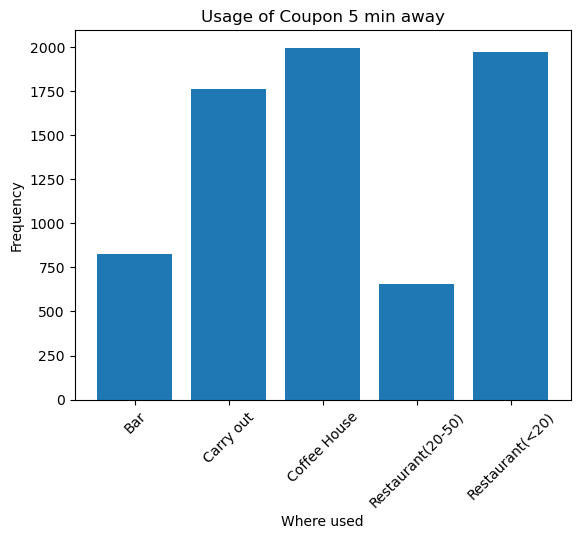

In [404]:
# For the x-axis I am looking to compute the data from the dataset, but I can´t.
# So I created manually a new series 'coupon' with all differnet coupon data
fig, ax = plt.subplots()
coupon  = ['Bar','Carry out','Coffee House','Restaurant(20-50)','Restaurant(<20)']
# Select only used coupons with 5 minutes away
ax.bar(coupon, value['toCoupon_GEQ5min'])
plt.xticks(rotation=45)
plt.title('Usage of Coupon 5 min away')
plt.xlabel('Where used')
plt.ylabel('Frequency')
plt.show()

In [405]:
# I have tried plotly library for the same data as before only to have interactive plot
# Select only used coupons with 5 minutes away
fig = px.bar(value, x=coupon, y=value['toCoupon_GEQ5min'], labels={'x':'Where used','toCoupon_GEQ5min':'Frequncy'}, title='Bar Plot of 5min Away Coupon')
#fig = px.bar(value, x=coupon, y=value['toCoupon_GEQ15min'], labels={'x':'Where used','toCoupon_GEQ15min':'Frequency'}, title='Bar Plot of 15min Away Coupon')
#fig = px.bar(value, x=coupon, y=value['toCoupon_GEQ25min'], labels={'x':'Where used','toCoupon_GEQ25min':'Frequency'}, title='Bar Plot of 25min Away Coupon')
fig.show()

In [406]:
# Plot the same as before only for 15min away coupons
#fig = px.bar(value, x=coupon, y=value['toCoupon_GEQ5min'], labels={'x':'Where used','toCoupon_GEQ5min':'Frequncy'}, title='Bar Plot of 5min Away Coupon')
fig = px.bar(value, x=coupon, y=value['toCoupon_GEQ15min'], labels={'x':'Where used','toCoupon_GEQ15min':'Frequency'}, title='Bar Plot of 15min Away Coupon')
#fig = px.bar(value, x=coupon, y=value['toCoupon_GEQ25min'], labels={'x':'Where used','toCoupon_GEQ25min':'Frequency'}, title='Bar Plot of 25min Away Coupon')
fig.show()

In [407]:
# Plot the same as before only for 25min away coupons
#fig = px.bar(value, x=coupon, y=value['toCoupon_GEQ5min'], labels={'x':'Used where','toCoupon_GEQ5min':'Frequncy'}, title='Bar Plot of 5min Away Coupon')
#fig = px.bar(value, x=coupon, y=value['toCoupon_GEQ15min'], labels={'x':'Used where','toCoupon_GEQ15min':'Frequency'}, title='Bar Plot of 15min Away Coupon')
fig = px.bar(value, x=coupon, y=value['toCoupon_GEQ25min'], labels={'x':'Where used','toCoupon_GEQ25min':'Frequency'}, title='Bar Plot of 25min Away Coupon')
fig.show()

6. Use a histogram to visualize the temperature column.

In [408]:
# use plotly historgram visualization
fig = px.histogram(data, x='temperature', title='Bar Plot Temperature')
fig.show()

In [409]:
# The visualization show an interested output: There are no data in the dataset with a temperature between
# 60° and 80°F 

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [410]:
# prepare new DataFrame "df_bar" with a simple query() 

df_bar = data.query('coupon=="Bar"')
print(df_bar)
df_bar.head(5)
print("-------------------")
print("Print df_bar.info()")
print("-------------------")
df_bar.info()

           destination  passanger weather  temperature  time coupon  \
9      No Urgent Place     Kid(s)   Sunny           80  10AM    Bar   
13                Home      Alone   Sunny           55   6PM    Bar   
17                Work      Alone   Sunny           55   7AM    Bar   
24     No Urgent Place  Friend(s)   Sunny           80  10AM    Bar   
35                Home      Alone   Sunny           55   6PM    Bar   
...                ...        ...     ...          ...   ...    ...   
12663  No Urgent Place  Friend(s)   Sunny           80  10PM    Bar   
12664  No Urgent Place  Friend(s)   Sunny           55  10PM    Bar   
12667  No Urgent Place      Alone   Rainy           55  10AM    Bar   
12670  No Urgent Place    Partner   Rainy           55   6PM    Bar   
12682             Work      Alone   Snowy           30   7AM    Bar   

      expiration  gender age      maritalStatus  ...  CarryAway  \
9             1d  Female  21  Unmarried partner  ...      never   
13           

2. What proportion of bar coupons were accepted?


In [411]:
# lets check get the proportion
value_accept      = df_bar[df_bar['Y']>0].count()['Y']
value_not_accept  = df_bar[df_bar['Y']==0].count()['Y']
value_total       = df_bar.count()['Y']
print('Coupon accepted:                               ' , value_accept)
print('Coupon not accepted:                           ' , value_not_accept)
print('Coupon total sum:                              ' , value_total)
print(f'The percentage of accepting the bar coupon is : ' + str(round(value_accept/value_total * 100, 1)) + ' %')

Coupon accepted:                                827
Coupon not accepted:                            1190
Coupon total sum:                               2017
The percentage of accepting the bar coupon is : 41.0 %


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [412]:
# first I have to check where I get the data in a monthly manner
# therefore I print one row to see all data of the row
df_bar.iloc[100]
# In the dataset there is no column to compute or get the monthly data.
# So I assume the the dataset is coming in a monthy manner.

destination                        No Urgent Place
passanger                                  Partner
weather                                      Sunny
temperature                                     80
time                                           6PM
coupon                                         Bar
expiration                                      1d
gender                                        Male
age                                             36
maritalStatus                    Unmarried partner
has_children                                     0
education                         Bachelors degree
occupation              Education&Training&Library
income                             $25000 - $37499
car                                            NaN
Bar                                          never
CoffeeHouse                                  never
CarryAway                                   4 to 8
RestaurantLessThan20                    9 and more
Restaurant20To50               

In [413]:
# first compute all coupons they are used.
total_accept       = df_bar.query('Y==1').count()['Y']
# now compute all customer they are went 1 to 3 times to bar
# therefore I used the are "select_list" variable to use in the query
select_list        = {'never','1 to 3'}
# I use the count() function to count the selected rows
value_accept_0to3  = df_bar.query('Y==1 and Bar in @select_list').count()['Y']
# Similar I do the same for customer they are went 4 and more times to bar
select_list        = {'4 to 8', '9 and more'}
value_accept_3tom  = df_bar.query('Y==1 and Bar in @select_list').count()['Y']
# lets do some double check and compute the accepted all in the same way as we 
# compute the others
select_list        = {'never','1 to 3','4 to 8', '9 and more'}
value_accept_all   = df_bar.query('Y==1 and Bar in @select_list').count()['Y']
select_list        = {'never'}
value_accept_never = df_bar.query('Y==1 and Bar in @select_list').count()['Y']
print('Never went to Bar before:                          ' , value_accept_never)
print('Went 0 to 3 times to Bar:                          ' , value_accept_0to3)
print('Went 3 to many times to Bar:                       ' , value_accept_3tom)
print('Total customer went to Bar:                        ' , value_accept_all)
print('Total sum:                                         ' , total_accept)
print(f'The acceptance rate of customer <never> is:       ' + str(round(value_accept_never/total_accept * 100, 1)) + ' %')
print(f'The acceptance rate of customer <0 to 3> is:      ' + str(round(value_accept_0to3/total_accept * 100, 1)) + ' %')
print(f'The acceptance rate of customer <4 or more> is:   ' + str(round(value_accept_3tom/total_accept * 100, 1)) + ' %')

Never went to Bar before:                           417
Went 0 to 3 times to Bar:                           674
Went 3 to many times to Bar:                        153
Total customer went to Bar:                         827
Total sum:                                          827
The acceptance rate of customer <never> is:       50.4 %
The acceptance rate of customer <0 to 3> is:      81.5 %
The acceptance rate of customer <4 or more> is:   18.5 %


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [414]:
# first analyse the dataset for comparing the age
# in the dataset the age is a string and have to changed to a int64 or float64 for 
# further computation
type(df_bar['age'])

# df_bar['age'] = df_bar['age'].astype('float64')
# got an error with the above command --> there is a value '50plus'
# lets see what kind of different entries are in the dataset
print('------- Before cleaning --------')
#if type(df_bar['age']) =='str' : 
result = df_bar.loc[df_bar['age'] > '', ['age']]
result = result.groupby('age').agg(max)
for i in range (len(result)):
    print(f"Show 'age' version {i} data value:  ", result.iloc[i])
# yes there are two not convertable strings in the dataset
# --> change 50plus to 51
# --> change below21 to 20
df_bar.replace('50plus','51', inplace=True)
df_bar.replace('below21','20', inplace=True)
print('------- After cleaning ---------')
#if type(df_bar['age']) =='str' :
result = df_bar.loc[df_bar['age'] > '', ['age']]
result = result.groupby('age').agg(max)
for i in range (len(result)):
    print(f"Show 'age' version {i} data value:  ", result.iloc[i])
if type(df_bar['age']) !='int64' : 
    df_bar['age'] = df_bar['age'].astype('int64')

------- Before cleaning --------
Show 'age' version 0 data value:   Series([], Name: 21, dtype: float64)
Show 'age' version 1 data value:   Series([], Name: 26, dtype: float64)
Show 'age' version 2 data value:   Series([], Name: 31, dtype: float64)
Show 'age' version 3 data value:   Series([], Name: 36, dtype: float64)
Show 'age' version 4 data value:   Series([], Name: 41, dtype: float64)
Show 'age' version 5 data value:   Series([], Name: 46, dtype: float64)
Show 'age' version 6 data value:   Series([], Name: 50plus, dtype: float64)
Show 'age' version 7 data value:   Series([], Name: below21, dtype: float64)
------- After cleaning ---------
Show 'age' version 0 data value:   Series([], Name: 20, dtype: float64)
Show 'age' version 1 data value:   Series([], Name: 21, dtype: float64)
Show 'age' version 2 data value:   Series([], Name: 26, dtype: float64)
Show 'age' version 3 data value:   Series([], Name: 31, dtype: float64)
Show 'age' version 4 data value:   Series([], Name: 36, dtype

C:\Users\UNR\AppData\Local\Temp\ipykernel_20260\1093189058.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\UNR\AppData\Local\Temp\ipykernel_20260\1093189058.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\UNR\AppData\Local\Temp\ipykernel_20260\1093189058.py:27: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [415]:
# first analyse the dataset for comparing the age
# in the dataset the age is a string and have to changed to a int64 for 
# further computation
df_bar['age']                     = df_bar['age'].astype('int64')
select_list                       = {'1 to 3','4 to 8', '9 and more'}
select_moving                     = {'Car'}
value_accept_gt25_driver          = df_bar.query('Y==1 and Bar in @select_list and age>25 and moving_by in @select_moving').count()['Y']
value_accept_gt20_driver          = df_bar.query('Y==1 and Bar in @select_list and age>20 and moving_by in @select_moving').count()['Y']
value_accept_lt21_driver          = df_bar.query('Y==1 and Bar in @select_list and age<21 and moving_by in @select_moving').count()['Y']
value_accept_gt25_non_driver      = df_bar.query('Y==1 and Bar in @select_list and age>25').count()['Y']
value_accept_lt21_non_driver      = df_bar.query('Y==1 and Bar in @select_list and age<21').count()['Y']
value_accept_gt20_lt26_non_driver = df_bar.query('Y==1 and Bar in @select_list and age>20 and age<26').count()['Y']
value_accept_driver               = df_bar.query('Y==1 and moving_by in @select_moving').count()['Y']
print('Never went to Bar before:                                        ' , value_accept_never)
print('Went 0 to 3 times to Bar:                                        ' , value_accept_0to3)
print('Went 3 or more times to Bar:                                     ' , value_accept_3tom)
print('Went 1 or more times to Bar, is driver and over 25 years:        ' , value_accept_gt25_driver)
print('Went 1 or more times to Bar and over 25 years:                   ' , value_accept_gt25_driver)
print('Went to Bar with car:                                            ' , value_accept_driver)
print('Total customer went to Bar:                                      ' , value_accept_all)
print('Total sum:                                                       ' , total_accept)
print(f'The acceptance rate of customer <never> is:                     ' + str(round(value_accept_never/total_accept * 100, 1)) + ' %')
print(f'The acceptance rate of customer <0 to 3> is:                    ' + str(round(value_accept_0to3/total_accept * 100, 1)) + ' %')
print(f'The acceptance rate of customer <4 or more> is:                 ' + str(round(value_accept_3tom/total_accept * 100, 1)) + ' %')
print(f'The acceptance rate of customer <1 or more,<21,diver> is:       ' + str(round(value_accept_lt21_driver/total_accept * 100, 1)) + ' %')
print(f'The acceptance rate of customer <1 or more,>20,diver> is:       ' + str(round(value_accept_gt20_driver/total_accept * 100, 1)) + ' %')
print(f'The acceptance rate of customer <1 or more,>25,diver> is:       ' + str(round(value_accept_gt25_driver/total_accept * 100, 1)) + ' %')
print(f'The acceptance rate of customer <1 or more,>25years> is:        ' + str(round(value_accept_gt25_non_driver/total_accept * 100, 1)) + ' %')
print(f'The acceptance rate of customer <1 or more,<21years> is:        ' + str(round(value_accept_lt21_non_driver/total_accept * 100, 1)) + ' %')
print(f'The acceptance rate of customer <1 or more,>20 & <26years> is:  ' + str(round(value_accept_gt20_lt26_non_driver/total_accept * 100, 1)) + ' %')

# Results:
# 1.) There is no customer who is over 25 years and went by car to the bar more than 4 times
# 2.) There is no customer who is coming by car to go to the bar
# 3.) There are around 3 times more customer older than 25 years than 25 und younger 

Never went to Bar before:                                         417
Went 0 to 3 times to Bar:                                         674
Went 3 or more times to Bar:                                      153
Went 1 or more times to Bar, is driver and over 25 years:         0
Went 1 or more times to Bar and over 25 years:                    0
Went to Bar with car:                                             0
Total customer went to Bar:                                       827
Total sum:                                                        827
The acceptance rate of customer <never> is:                     50.4 %
The acceptance rate of customer <0 to 3> is:                    81.5 %
The acceptance rate of customer <4 or more> is:                 18.5 %
The acceptance rate of customer <1 or more,<21,diver> is:       0.0 %
The acceptance rate of customer <1 or more,>20,diver> is:       0.0 %
The acceptance rate of customer <1 or more,>25,diver> is:       0.0 %
The acceptance rate of 

C:\Users\UNR\AppData\Local\Temp\ipykernel_20260\3266711363.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [416]:
# first check the different entries for "passanger" while print out
result = df_bar.loc[data['passanger'] > '', ['passanger']]
result = result.groupby('passanger').agg(max)
for i in range (len(result)):
    print(f"Show 'passanger' version {i} data value:  {result.iloc[i]}")

Show 'passanger' version 0 data value:  Series([], Name: Alone, dtype: float64)
Show 'passanger' version 1 data value:  Series([], Name: Friend(s), dtype: float64)
Show 'passanger' version 2 data value:  Series([], Name: Kid(s), dtype: float64)
Show 'passanger' version 3 data value:  Series([], Name: Partner, dtype: float64)


In [417]:
# first analyse the dataset to see what kind of data a in the column 'occupations' and 'kid'
 
select_list                       = {'1 to 3','4 to 8', '9 and more'}
select_moving                     = {'Car'}
select_kid                        = {'Kid(s)'}
value_accept_bar_driver           = len(df_bar.query('Y==1 and Bar in @select_list and moving_by in @select_moving'))
value_accept_bar_driver_no_kid    = len(df_bar.query('Y==1 and Bar in @select_list and moving_by in @select_moving and passanger not in @select_kid'))
value_driver_no_kid               = len(df_bar.query('moving_by in @select_moving and passanger not in @select_kid'))

print('Went to Bar with car:                                            ' , value_accept_bar_driver)
print('Went to Bar with car and no kids:                                ' , value_accept_bar_driver_no_kid)
print('Went with car and no kids:                                       ' , value_driver_no_kid)
print('Total customer went to Bar:                                      ' , value_accept_all)

# Results:
# 1.) There is no customer who is over 25 years and went by car to the bar more than 4 times
# 2.) There is no customer who is coming by car to go to the bar
# 3.) There are around 3 times more customer older than 25 years than 25 und younger 

Went to Bar with car:                                             0
Went to Bar with car and no kids:                                 0
Went with car and no kids:                                        4
Total customer went to Bar:                                       827


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [418]:
# first check the different entries for "maritalStatus" while print out
result = df_bar.loc[data['maritalStatus'] > '', ['maritalStatus']]
result = result.groupby('maritalStatus').agg(max)
for i in range (len(result)):
    print(f"Show 'maritalStatus' version {i} data value:  {result.iloc[i]}")

Show 'maritalStatus' version 0 data value:  Series([], Name: Divorced, dtype: float64)
Show 'maritalStatus' version 1 data value:  Series([], Name: Married partner, dtype: float64)
Show 'maritalStatus' version 2 data value:  Series([], Name: Single, dtype: float64)
Show 'maritalStatus' version 3 data value:  Series([], Name: Unmarried partner, dtype: float64)
Show 'maritalStatus' version 4 data value:  Series([], Name: Widowed, dtype: float64)


In [419]:
# first check the different entries for "income" while print out
result = df_bar.loc[data['income'] > '', ['income']]
result = result.groupby('income').agg(max)
for i in range (len(result)):
    print(f"Show 'income' version {i} data value:  {result.iloc[i]}")

Show 'income' version 0 data value:  Series([], Name: $100000 or More, dtype: float64)
Show 'income' version 1 data value:  Series([], Name: $12500 - $24999, dtype: float64)
Show 'income' version 2 data value:  Series([], Name: $25000 - $37499, dtype: float64)
Show 'income' version 3 data value:  Series([], Name: $37500 - $49999, dtype: float64)
Show 'income' version 4 data value:  Series([], Name: $50000 - $62499, dtype: float64)
Show 'income' version 5 data value:  Series([], Name: $62500 - $74999, dtype: float64)
Show 'income' version 6 data value:  Series([], Name: $75000 - $87499, dtype: float64)
Show 'income' version 7 data value:  Series([], Name: $87500 - $99999, dtype: float64)
Show 'income' version 8 data value:  Series([], Name: Less than $12500, dtype: float64)


In [420]:
# first check the different entries for "coupon" while print out
result = data.loc[data['coupon'] > '', ['coupon']]
result = result.groupby('coupon').agg(max)
for i in range (len(result)):
    print(f"Show 'coupon' version {i} data value:  {result.iloc[i]}")

Show 'coupon' version 0 data value:  Series([], Name: Bar, dtype: float64)
Show 'coupon' version 1 data value:  Series([], Name: Carry out & Take away, dtype: float64)
Show 'coupon' version 2 data value:  Series([], Name: Coffee House, dtype: float64)
Show 'coupon' version 3 data value:  Series([], Name: Restaurant(20-50), dtype: float64)
Show 'coupon' version 4 data value:  Series([], Name: Restaurant(<20), dtype: float64)


In [421]:
# first create dataset for cheap restaurant
# prepare new DataFrame "df_bar" with a simple query() 

df_cheap_rest = data.query('coupon=="Restaurant(<20)"')
#print(df_cheap_rest)

print("--------------------------")
print("Print df_cheap_rest.info()")
print("--------------------------")
print("Sizeof rows cheap restaurants:  ", len(df_cheap_rest))
print("--------------------------")
df_cheap_rest.info()
df_cheap_rest.head(3)

--------------------------
Print df_cheap_rest.info()
--------------------------
Sizeof rows cheap restaurants:   2786
--------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2786 entries, 0 to 12678
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           2786 non-null   object
 1   passanger             2786 non-null   object
 2   weather               2786 non-null   object
 3   temperature           2786 non-null   int64 
 4   time                  2786 non-null   object
 5   coupon                2786 non-null   object
 6   expiration            2786 non-null   object
 7   gender                2786 non-null   object
 8   age                   2786 non-null   object
 9   maritalStatus         2786 non-null   object
 10  has_children          2786 non-null   int64 
 11  education             2786 non-null   object
 12  occupation            2786 non-null   obj

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,moving_by
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,4 to 8,1 to 3,1,0,0,0,1,1,unkown
5,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,4 to 8,1 to 3,1,1,0,0,1,1,unkown
7,No Urgent Place,Kid(s),Sunny,80,10AM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,4 to 8,1 to 3,1,1,0,0,1,1,unkown


In [422]:
# We do the analyzing as before
# first we setup the selection lists:
select_list                           = {'1 to 3','4 to 8', '9 and more'}
select_moving                         = {'Car'}
select_kid                            = {'Kid(s)'}
select_passanger                      = {'Friend(s)', 'Partner'}
select_marital                        = {'Widowed'}
value_accept_bar_driver_nokid_noWidow = len(df_bar.query('Y==1 and Bar in @select_list and moving_by in @select_moving and passanger in @select_passanger and maritalStatus not in @select_marital'))
value_accept_bar_driver_lt30          = len(df_bar.query('Y==1 and Bar in @select_list and moving_by in @select_moving and age<30'))
# select cheap restaurant > 4 times & income less than 50K
# The dataset messures only "4 to 8", the request is more than 4. That means if we use the 
# the entries "4 to 8" it could be also customer with only 4 times visiting the restaurant.
# --> I will take also the "4 to 8" in the calculation, because if we start with "9 and more" the 
# results will be more wrong!
select_list                           = {'4 to 8', '9 and more'}
select_list_income                    = {'$12500 - $24999','$25000 - $37499','$37500 - $49999'}
value_accept_rest_driver_income       = len(df_cheap_rest.query('Y==1 and RestaurantLessThan20 in @select_list and moving_by in @select_moving and income in @select_list_income'))

print('Went to Bar with car more than one, passangers <Friends or Partner> and not widowed:  ' , value_accept_bar_driver_nokid_noWidow)
print('Went to Bar with car more than one, less than 30 years old:                           ' , value_accept_bar_driver_lt30)
print('Went to cheap restaurant with car more than 3 times, income less 50K:                 ' , value_accept_rest_driver_income)

Went to Bar with car more than one, passangers <Friends or Partner> and not widowed:   0
Went to Bar with car more than one, less than 30 years old:                            0
Went to cheap restaurant with car more than 3 times, income less 50K:                  0


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [423]:
# It looks like that car driver do not went to bar with the car.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [424]:
# first check the different entries for "coupon" while print out
result = data.loc[data['coupon'] > '', ['coupon']]
result = result.groupby('coupon').agg(max)
for i in range (len(result)):
    print(f"Show 'coupon' version {i} data value:  {result.iloc[i]}")

Show 'coupon' version 0 data value:  Series([], Name: Bar, dtype: float64)
Show 'coupon' version 1 data value:  Series([], Name: Carry out & Take away, dtype: float64)
Show 'coupon' version 2 data value:  Series([], Name: Coffee House, dtype: float64)
Show 'coupon' version 3 data value:  Series([], Name: Restaurant(20-50), dtype: float64)
Show 'coupon' version 4 data value:  Series([], Name: Restaurant(<20), dtype: float64)


In [425]:
# let´s see how the new column looks like
result = data.loc[(data['moving_by'] > ''), ['moving_by']]
result = result.groupby('moving_by').agg(max)
for i in range (len(result)):
    print(f"Show car version {i} data value:  ", result.iloc[i])

Show car version 0 data value:   Series([], Name: Car, dtype: float64)
Show car version 1 data value:   Series([], Name: Scooter or Motorcycle, dtype: float64)
Show car version 2 data value:   Series([], Name: crossover, dtype: float64)
Show car version 3 data value:   Series([], Name: unkown, dtype: float64)


In [426]:
# lets exermine the coupon "Coffee House"
# first check create a new dataset for our purpos
df_coffee = data.query('coupon=="Coffee House" and Y==1')
print("Accepted coupons of type <Coffee House>:                                                        ", len(df_coffee))
# check how many are coming by car
select_list                  = {'1 to 3','4 to 8', '9 and more'}
select_moving                = {'Car'}
value_coming_car             = len(df_coffee.query('moving_by in @select_moving'))
value_coming_car_coffeeHouse = len(df_coffee.query('CoffeeHouse in @select_list and moving_by in @select_moving'))
select_moving                = {'Scooter or Motorcycle'}
value_coffeeHouse_scooter    = len(df_coffee.query('CoffeeHouse in @select_list and moving_by in @select_moving'))
select_moving                = {'unkown'}
value_coffeeHouse_unkown     = len(df_coffee.query('CoffeeHouse in @select_list and moving_by in @select_moving'))
select_moving                = {'crossover'}
value_coffeeHouse_crossover  = len(df_coffee.query('CoffeeHouse in @select_list and moving_by in @select_moving'))
value_coffeeHouse_all        = len(df_coffee.query('CoffeeHouse in @select_list'))

print('Went with car and coupon <Coffee House> more than once:                                         ' , value_coming_car)
print('Went with car and coupon <Coffee House> to CoffeeHouse more than once:                          ' , value_coming_car_coffeeHouse)
print()
print('Went with "Scooter or Motorcycle" and coupon <Coffee House> to CoffeeHouse more than once:      ' , value_coffeeHouse_scooter)
print('Went with "unkown" and coupon <Coffee House> to CoffeeHouse more than once:                     ' , value_coffeeHouse_unkown)
print('Went "crossover" and coupon <Coffee House> to CoffeeHouse more than once:                       ' , value_coffeeHouse_crossover)
print('Went "all movings" and coupon <Coffee House> to CoffeeHouse more than once:                     ' , value_coffeeHouse_all)
print()
# results:
# The dataset does not save really the moving type of the customer. There are only 9 customer 
# mentioned and 1260 are "unkown".
# --> Therefore the "moving_by" column cannot really be used and should be new measured if want to be used!

Accepted coupons of type <Coffee House>:                                                         1995
Went with car and coupon <Coffee House> more than once:                                          10
Went with car and coupon <Coffee House> to CoffeeHouse more than once:                           0

Went with "Scooter or Motorcycle" and coupon <Coffee House> to CoffeeHouse more than once:       5
Went with "unkown" and coupon <Coffee House> to CoffeeHouse more than once:                      1260
Went "crossover" and coupon <Coffee House> to CoffeeHouse more than once:                        4
Went "all movings" and coupon <Coffee House> to CoffeeHouse more than once:                      1269



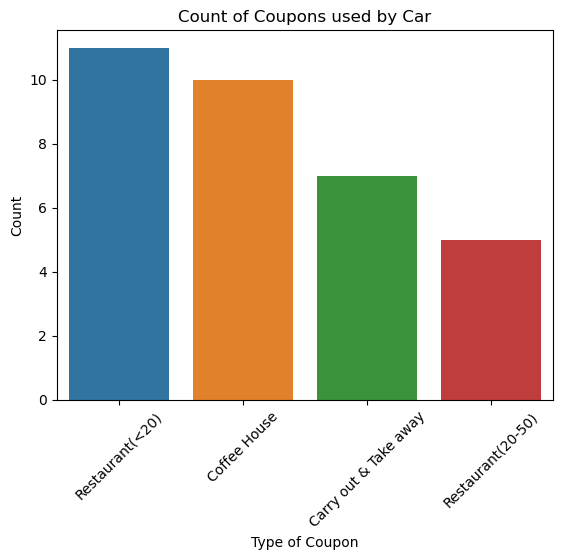

In [427]:
# Do some visualizations for better understanding
fig = sns.countplot(x="coupon", data=data.query('Y==1 and moving_by=="Car"'))
plt.xlabel("Type of Coupon")
plt.ylabel("Count")
plt.title("Count of Coupons used by Car")
plt.xticks(rotation=45)
plt.show(fig)
# Result:
# The plot shows that very less coupons are used by car

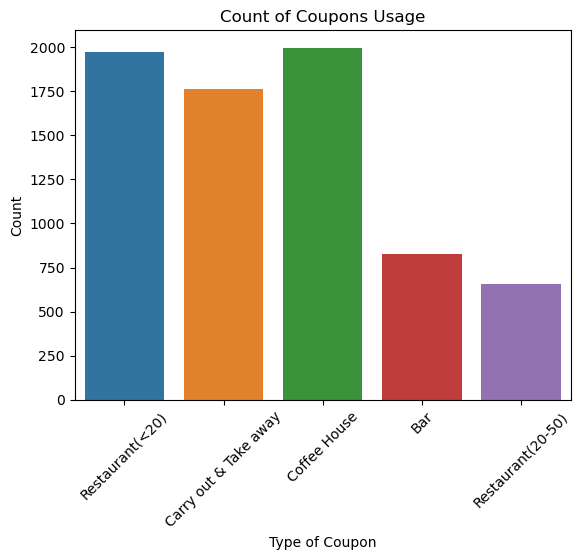

In [428]:
# Do some visualizations for better understanding
fig = sns.countplot(x="coupon", data=data.query('Y==1'))
plt.xlabel("Type of Coupon")
plt.ylabel("Count")
plt.title("Count of Coupons Usage")
plt.xticks(rotation=45)
plt.show(fig)
# Result:
# Shows that most of the coupons are used for "cheap restaurants", for "take away" or "Coffee Houses"

In [429]:
# Do some visualizations for better understanding
fig = px.histogram(data,x="age",title="Histogram of Ages by Coupons", labels={"age": "Age"},color_discrete_sequence = px.colors.qualitative.Dark24, color = "coupon" )
fig.show()

In [430]:
# Do some visualizations for better understanding
fig1 = px.scatter(data, x = "age", y = "coupon")
fig1.show()

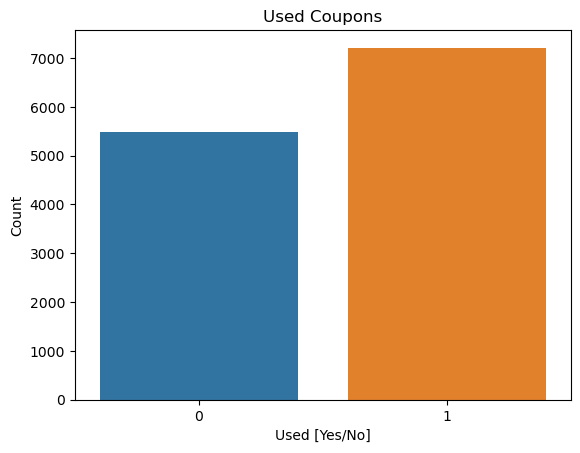

In [431]:
# check how many coupons are used totaly
sns.countplot(data = data, x = 'Y')
plt.title('Used Coupons')
plt.xlabel('Used [Yes/No]')
plt.ylabel("Count")
#plt.xticks(rotation=45)
plt.savefig('images/used_coupon_barplot_01.png')

<Axes: xlabel='age', ylabel='Count'>

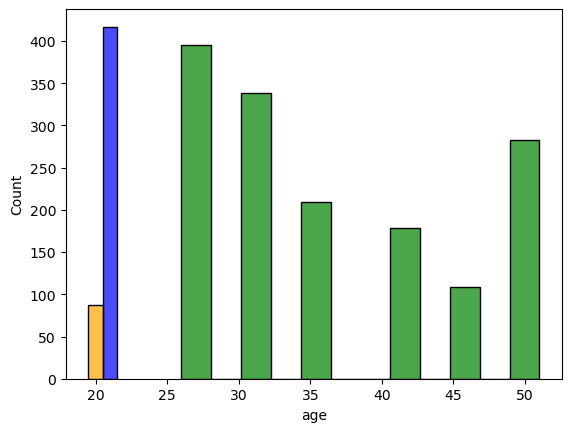

In [432]:
# Do a visualization where showing the bar customer with their age
class_1 = df_bar.loc[df_bar['age'] < 21]['age']
class_2 = df_bar.loc[(df_bar['age'] > 20) & (df_bar['age'] < 26)]['age']
class_3 = df_bar.loc[df_bar['age'] > 25]['age']
sns.histplot(class_1, color = 'orange', alpha = 0.7)
sns.histplot(class_2, color = 'blue', alpha = 0.7)
sns.histplot(class_3, color = 'green', alpha = 0.7)